In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

In [ ]:
import os
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the main directory containing category folders
main_data_dir = 'C:\Users\Dharukesh M\Desktop\Arunai_hack\dataset2'

# Check if the dataset directory exists
if not os.path.exists(main_data_dir):
    print(f"❌ Error: Dataset directory '{main_data_dir}' not found. Please check the path.")
    exit()

# List all subdirectories (class folders) in the main directory
class_folders = [d for d in os.listdir(main_data_dir) if os.path.isdir(os.path.join(main_data_dir, d))]

# Check if dataset contains category folders
if not class_folders:
    print("⚠️ Warning: No category folders found in 'Dataset1'.")
    exit()

# Gather all images with their corresponding category
all_images = []
image_labels = []
for class_folder in class_folders:
    class_folder_path = os.path.join(main_data_dir, class_folder)
    
    # Collect all image files from the folder
    image_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Check if the folder contains images
    if not image_files:
        print(f"⚠️ Warning: No images found in '{class_folder}'. Skipping this category.")
        continue

    all_images.extend([os.path.join(class_folder_path, f) for f in image_files])
    image_labels.extend([class_folder] * len(image_files))  # Assign category labels to each image

# Check if we have images to display
if not all_images:
    print("❌ Error: No images found in the dataset. Please check your dataset structure.")
    exit()

# Set the number of images per row
images_per_row = 10

# Calculate the number of rows needed
num_rows = math.ceil(len(all_images) / images_per_row)

# Ensure at least 1 row
num_rows = max(1, num_rows)

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, num_rows * 3))

# Flatten axes for easy indexing
axs = axs.flatten()

# Display all images in the grid
for i, (image_path, label) in enumerate(zip(all_images, image_labels)):
    img = mpimg.imread(image_path)
    axs[i].imshow(img)
    axs[i].set_title(label, fontsize=8)  # Show category as title
    axs[i].axis('off')

# Hide any unused subplots
for ax in axs[len(all_images):]:
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Found 1322 images belonging to 1 classes.


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Dharukesh M\\Desktop\\Arunai_hack\\dataset2\\val'

In [84]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

In [ ]:
main_data_dir = 'dataset2'

batch_size = 32
num_classes = len(os.listdir(main_data_dir))
epochs = 10
# List all subdirectories (class folders) in the main directory
class_folders = os.listdir(main_data_dir)

split_ratio = 0.8

In [87]:
# Create ImageDataGenerator with data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=1 - split_ratio  # Set validation split
)

train_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify training subset
)

# Load and preprocess validation data using the generator
validation_generator = train_datagen.flow_from_directory(
    main_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 139 images belonging to 5 classes.


Found 31 images belonging to 5 classes.


In [88]:
# Load MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2916 - loss: 1.8351 - val_accuracy: 0.7419 - val_loss: 0.9071
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.6562 - loss: 1.1841 - val_accuracy: 0.7742 - val_loss: 0.7428
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6602 - loss: 0.8262 - val_accuracy: 0.7419 - val_loss: 0.6531
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.7188 - loss: 0.8589 - val_accuracy: 0.7742 - val_loss: 0.5343
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7342 - loss: 0.7572 - val_accuracy: 0.7742 - val_loss: 0.3952
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.6875 - loss: 0.9096 - val_accuracy: 0.7742 - val_loss: 0.4678
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7656 - loss: 0.6334 - val_accuracy: 0.7419 - val_loss: 0.4960
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.7812 - loss: 0.4659 - val_accuracy: 0.7742 - val_loss: 0.4168
Epo

In [89]:
model.save('Animal_identification_model1.h5')

In [90]:
# Create label mapping based on subdirectory names
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(main_data_dir)))}

In [91]:
label_mapping

{0: 'Cheetah', 1: 'Jaguar', 2: 'Leopard', 3: 'Lion', 4: 'Tiger'}

In [139]:
# Test Image
folder_path = r"C:\Users\Dharukesh M\Desktop\AiML project\test"

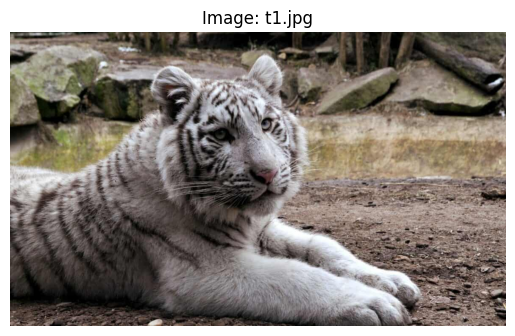

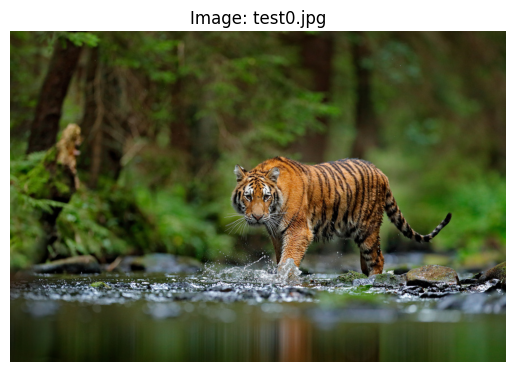

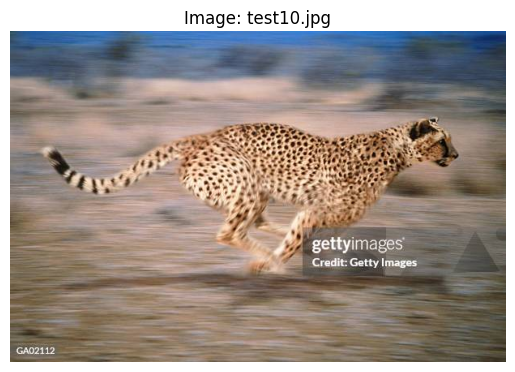

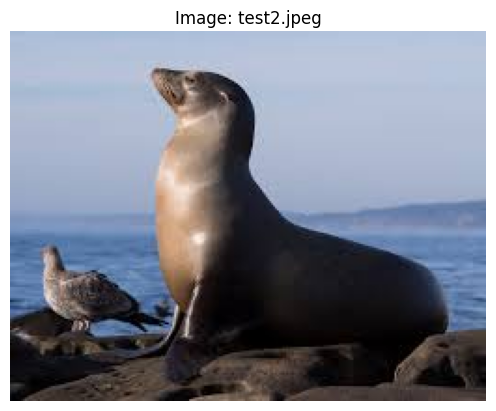

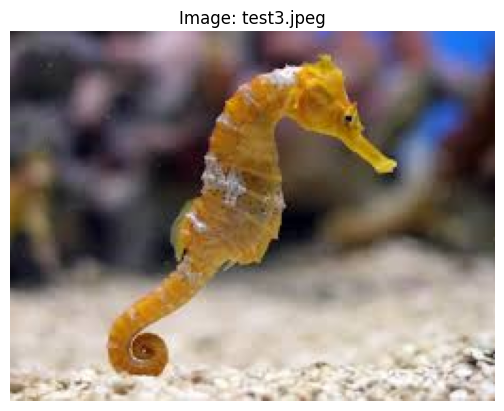

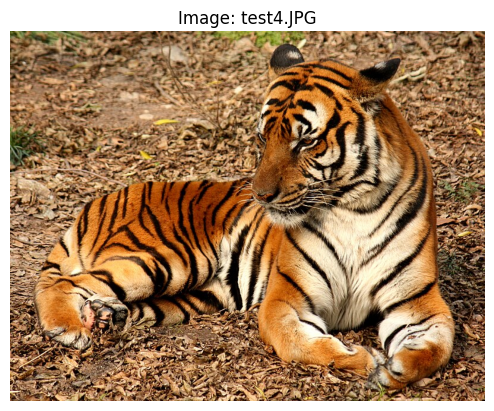

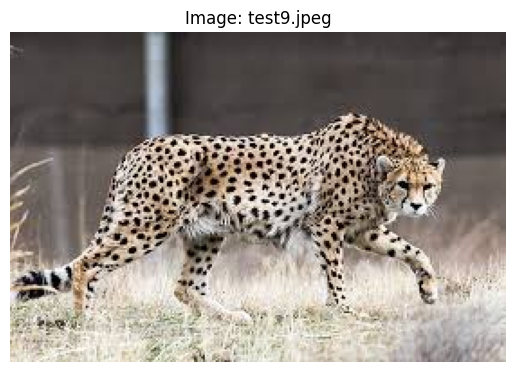

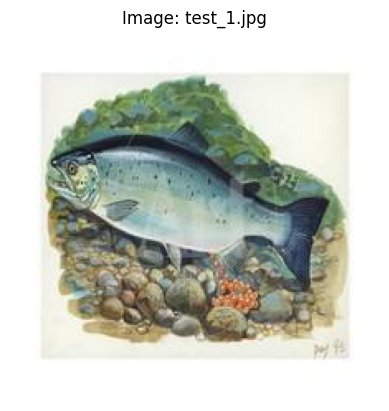

In [140]:
#For Folder 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the folder path containing your images
# folder_path = r"C:\Users\Dharukesh M\Desktop\AiML project\test"  # Replace with your folder path

# Get a list of all image files in the folder (supports JPG, JPEG, PNG)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Check if the folder contains any image files
if not image_files:
    print(f"No image files found in the folder: {folder_path}")
else:
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        try:
            # Load and display the image
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.axis('off')  # Turn off axis labels and ticks
            plt.title(f"Image: {image_file}")
            plt.show()
        except FileNotFoundError:
            print(f"Error: The file {image_path} was not found.")
        except Exception as e:
            print(f"An error occurred while processing {image_path}: {e}")


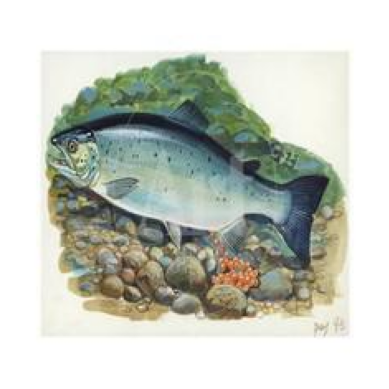

In [142]:
#For image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your image
# image_path = 't1.jpg'

try:
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

except FileNotFoundError:
    print(f"Error: The file at {image_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('Animal_identification_model1.h5')
# Load and preprocess a single image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_animal(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    
    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]
    
    return predicted_label, confidence

# Label mapping
label_mapping = {0: 'Cheetah', 1: 'Jaguar', 2: 'Leopard', 3: 'Lion', 4: 'Tiger'}

# Specify the folder containing test images
# test_folder = "path_to_test_images_folder"  # Replace with the path to your test image folder

# Process and predict for all images in the folder
test_images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for image_name in test_images:
    image_path = os.path.join(folder_path, image_name)
    predicted_label, confidence = predict_animal(image_path, label_mapping)
    
    # Display the input image and prediction
    image = load_img(image_path)
    plt.imshow(image)
    plt.axis('off')  # Remove axis
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}")
    plt.show()


NameError: name 'folder_path' is not defined